# 가장 좋은 결과를 낼 수 있는 feature항목 추출

## 모든 feature를 사용한 결과와, 선택 추출된 feature만 사용한 결과 정확도에 차이가 남
#### logistic 회귀 이용하여 coef_ 항목에서 영향력이 높은 feature를 선택. 최적의 갯수 선택

### 데이터 준비하기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
# 로지스틱회귀후에 .coef_ 항목에서 기준(criteria, 계수)보다 높은 영향력을 미치는 feature column 선택
def select_features(df, coef, criteria):
    sel_num = np.where(np.abs(coef) > criteria )[1]
    sel_col = df.columns[sel_num]
    return sel_col

In [3]:
def get_scores(data, target):
    train_input, test_input, train_target, test_target = train_test_split(data, target, random_state=42, test_size=0.2, stratify=target)

    ss = StandardScaler()
    ss.fit(train_input)
    train_scaled = ss.transform(train_input)
    test_scaled = ss.transform(test_input)

    lr = LogisticRegression(C=20, max_iter=4000) # max_iter default 100, 
#     lr = LogisticRegression(C=1, solver='newton_cg', max_iter=1000) # max_iter default 100, 
    lr.fit(train_scaled, train_target)

    train_score = lr.score(train_scaled, train_target)
    test_score = lr.score(test_scaled, test_target)
#     print(f'train score: {train_score:.4f} \n test score; {test_score:.4f}')
    return train_score, test_score, lr.coef_, lr.intercept_

In [4]:
def find_best_result(data, target):
# min을 하나씩 제거하면서 최고의 결과를 가져오는 feature갯수(항목) 선택

    train_score_list= []
    test_score_list = []
#     data_columns = []
#     data_coef = []
    test_s = 0
    train_score, test_score, coef, intercept = get_scores(data, target)
    for _ in range(len(data.columns)-1):
        criteria = np.abs(coef).min()
        sel_col = select_features(data, coef, criteria)
        data = df[sel_col]
        train_score, test_score, coef, intercept = get_scores(data, target)

        if test_score > test_s:
            test_s = test_score
            data_columns = sel_col
            data_coef = coef

        train_score_list.append(train_score)
        test_score_list.append(test_score)
    
    return train_score_list, test_score_list, data_columns, data_coef

In [5]:
# 분석용 데이터 입력
directory_for_ml = '../data/data_for_ml/'
fname = 'df_sec_sel.pkl'
f_name = directory_for_ml + fname
df = pd.read_pickle(f_name)
plt_title = fname[3:7]

In [6]:
data = df.iloc[:, :-3]

target = df.iloc[:, -1]
plt_title2 = 'r_open_high'

# target = df.iloc[:, -2]
# plt_title2 = 'close_cr'

In [7]:
train_score_list, test_score_list, data_columns, data_coef = find_best_result(data, target)

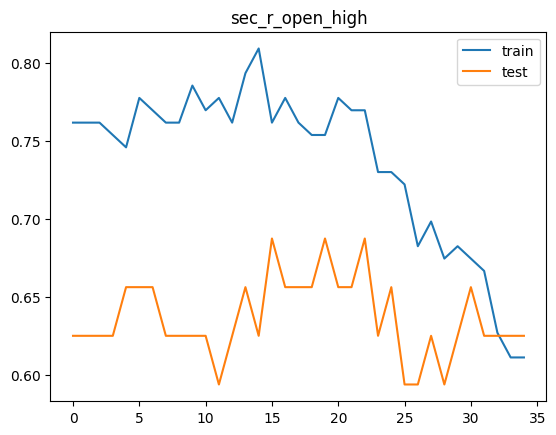

In [8]:
plt.plot(train_score_list, label = 'train')
plt.plot(test_score_list, label = 'test')
plt.title(plt_title+plt_title2)
plt.legend()

In [9]:
print(data_columns, data_coef)
print("train_max: {:.4f}, test_max: {:.4f}".format(max(train_score_list), max(test_score_list)))

Index(['institution', 'financial', 'pension', 'privequity', 'bank',
       'corporateetc', 'open', 'high', 'close', 'vol', 'ixic_f_cr', 'spx_cr',
       'bond_kor_10_cr', 'bond_kor_2_cr', 'bond_usa_10_cr', 'bond_usa_2_cr',
       'kosdaq_cr', 'kospi_cr', 'krw_cr', 'sox_cr'],
      dtype='object') [[ 0.62685106 -0.42888475 -2.17271315 -1.53614665 -0.42198217  0.8340691
  -1.00258981  1.13315005 -0.25843265 -0.45156744  1.91666242 -1.01959299
  -0.83453939  0.83780451 -0.42359171  0.63434234 -0.87131394  1.38269123
  -0.80212093 -1.08796295]]
train_max: 0.8095, test_max: 0.6875


In [10]:
data_columns.shape

(20,)

In [11]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_validate, train_test_split
from tensorflow import keras
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.model_selection import train_test_split

In [12]:
data_new = data[data_columns]
# target = df.iloc[:, -2]  # logistic regression에서 생성된 target을 그대로 사용

In [13]:
data_new.tail()

,institution,financial,pension,privequity,bank,corporateetc,open,high,close,vol,ixic_f_cr,spx_cr,bond_kor_10_cr,bond_kor_2_cr,bond_usa_10_cr,bond_usa_2_cr,kosdaq_cr,kospi_cr,krw_cr,sox_cr
2023-02-15,-1.748476,-1.891887,-5.774825,-1.134345,1.000000,-0.856239,0.011129,0.014286,0.004769,-0.137441,0.78,0.28,1.88,1.82,1.33,0.24,-1.81,-1.53,0.87,0.37
2023-02-16,-2.782808,-2.837823,-1.231693,-3.394218,-1.133569,-1.497500,0.004717,0.000000,-0.015823,0.424540,-1.94,-1.38,0.40,0.33,1.58,0.24,2.51,1.96,0.47,-2.48
2023-02-17,-2.130852,-2.412908,23.036662,-2.108946,3.439153,-3.621106,-0.021909,-0.003130,0.024116,0.057781,-0.74,-0.28,4.34,3.53,-1.19,-0.59,-1.16,-0.98,0.49,-1.62
2023-02-21,-1.264665,-1.452862,-0.722080,-0.068162,-0.975952,-0.679065,0.000000,-0.004739,0.001597,0.189417,-2.28,-2.00,-0.30,-0.64,2.68,1.39,0.57,0.16,0.75,-3.31
2023-02-22,-3.658527,-2.586873,2.233275,0.115514,25.000000,-2.519868,-0.003180,-0.003175,-0.009569,-0.408692,0.01,-0.16,1.28,0.83,-0.69,-0.67,-1.88,-1.68,-0.23,-0.48


In [14]:
train_input, test_input, train_target, test_target = train_test_split(data_new, target, random_state=42, test_size=0.2, stratify=target)

In [15]:
print(train_input.shape, train_target.shape)

(126, 20) (126,)


In [16]:
np.unique(train_target, return_counts=True)

(array([0, 1], dtype=int64), array([81, 45], dtype=int64))

In [17]:
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [18]:
value = []
for iter in range(5, 50, 1):
    sc = SGDClassifier(loss='log', max_iter=iter, random_state=42)
#     sc = SGDClassifier(max_iter=iter, random_state=42)
    scores = cross_validate(sc,
                            X=train_scaled, y=train_target,
                            n_jobs=-1)
#     print(scores['test_score'].mean())
    value.append(scores['test_score'].mean())

In [19]:
print("max", max(value))

max 0.6981538461538461


In [20]:
!rm *.h5

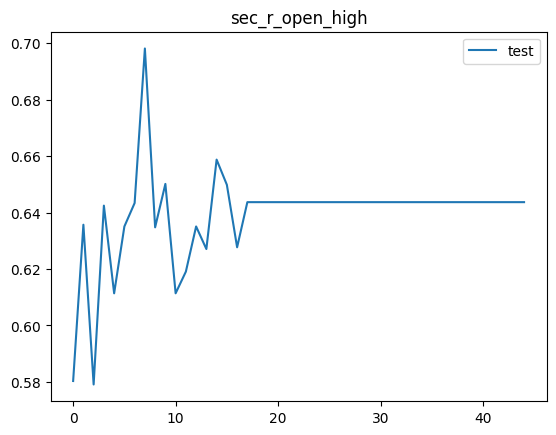

In [21]:
plt.plot(value, label = 'test')
plt.title(plt_title+plt_title2)
plt.legend()

### 인공신경망

In [22]:
def model_fn(inp_num, a_layer=None):
    model = Sequential()
    model.add(Dense(12, activation='sigmoid', input_shape=(inp_num,)))
    model.add(Dropout(0.3))
    model.add(Dense(6, activation='sigmoid'))
    model.add(Dropout(0.3))
    if a_layer:
        model.add(a_layer)
    model.add(Dense(1, activation='sigmoid'))
    
    return model

In [23]:
# model = model_fn(10, len(data_new.columns), 2, Dropout(0.3))
try :
    del model
    print("delete del")
except:
    pass
model = model_fn(len(data_new.columns))
model.compile(optimizer='adam', loss='binary_crossentropy', 
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                252       
                                                                 
 dropout (Dropout)           (None, 12)                0         
                                                                 
 dense_1 (Dense)             (None, 6)                 78        
                                                                 
 dropout_1 (Dropout)         (None, 6)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 337
Trainable params: 337
Non-trainable params: 0
_________________________________________________________________


In [24]:
# checkpoint_cb = ModelCheckpoint('best_model.h5', save_best_only=True)
checkpoint_cb = keras.callbacks.ModelCheckpoint(filepath='best_model_{epoch:02d}-{val_loss:.2f}-{val_accuracy:.2f}.h5', \
                                                monitor='val_accuracy', mode='max', save_best_only=True)
earlystopping_cb = keras.callbacks.EarlyStopping(patience=100, monitor='val_accuracy', mode='max', restore_best_weights=True)

In [25]:
np.unique(train_target), np.unique(test_target)

(array([0, 1], dtype=int64), array([0, 1], dtype=int64))

In [26]:
history = model.fit(train_scaled, train_target, epochs=2000, verbose=0,
                    callbacks=[checkpoint_cb, earlystopping_cb],
                    validation_data=(test_scaled, test_target))
# batch_size=

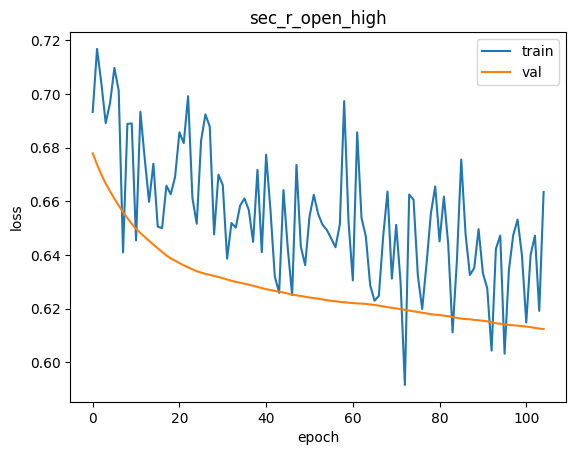

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.title(plt_title+plt_title2)
plt.show()

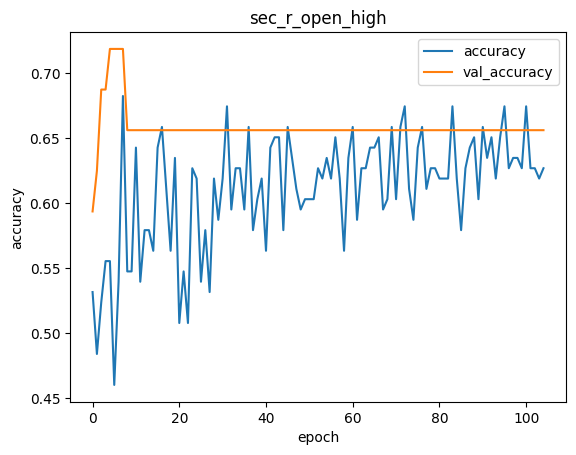

In [28]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['accuracy', 'val_accuracy'])
plt.title(plt_title+plt_title2)
plt.show()

In [33]:
earlystopping_cb.stopped_epoch

104

In [34]:
model.evaluate(test_scaled, test_target)

1/1 [==============================] - 0s 17ms/step - loss: 0.6638 - accuracy: 0.7188


[0.6638016700744629, 0.71875]

In [35]:
!ls best_*.*

best_model_01-0.68-0.59.h5
best_model_02-0.67-0.62.h5
best_model_03-0.67-0.69.h5
best_model_05-0.66-0.72.h5


In [36]:
model_val = load_model('best_model_05-0.66-0.72.h5')
model_val.evaluate(test_scaled, test_target)

1/1 [==============================] - 0s 87ms/step - loss: 0.6638 - accuracy: 0.7188


[0.6638016700744629, 0.71875]

In [60]:
for innum in range(30):
    aa = np.array([test_scaled[innum]])
    y_predict = model.predict(aa)
    print("predict: {},  target_value: {}".format(y_predict, test_target[innum]))

1/1 [==============================] - 0s 16ms/step
predict: [[0.4726434]],  target_value: 1
1/1 [==============================] - 0s 15ms/step
predict: [[0.42474237]],  target_value: 0
1/1 [==============================] - 0s 16ms/step
predict: [[0.4569304]],  target_value: 0
1/1 [==============================] - 0s 15ms/step
predict: [[0.46202612]],  target_value: 0
1/1 [==============================] - 0s 16ms/step
predict: [[0.4851529]],  target_value: 0
1/1 [==============================] - 0s 16ms/step
predict: [[0.4663462]],  target_value: 1
1/1 [==============================] - 0s 14ms/step
predict: [[0.48537382]],  target_value: 1
1/1 [==============================] - 0s 14ms/step
predict: [[0.51685524]],  target_value: 1
1/1 [==============================] - 0s 15ms/step
predict: [[0.48742452]],  target_value: 0
1/1 [==============================] - 0s 16ms/step
predict: [[0.4634077]],  target_value: 0
1/1 [==============================] - 0s 16ms/step
predict: [[0.

In [ ]:
### ROC 확인해 봐야 함. 정확도, 정밀도 등

In [54]:
y_predict, test_target[innum]

(array([[0.51685524]], dtype=float32), 1)

In [59]:
test_scaled.shape

(32, 20)

In [49]:
aa = np.array([test_scaled[10]])

In [39]:
test_scaled[5]

array([-0.06132714,  0.29380954, -0.36856992, -4.11928921, -0.13774618,
       -0.08457186, -0.96864017, -0.58454901, -0.19129368,  0.27840793,
       -0.67078214, -0.4498402 ,  1.07550479,  1.33380114, -0.21785944,
       -0.14396325, -2.60783549, -1.62489409,  0.34889679, -1.01337164])

In [ ]:
'''
model.save('my_model.h5')
model_new = load_model('my_model.h5')
model_new.evaluate(test_scaled, test_target)
'''